In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.svm import LinearSVC

from imblearn.over_sampling import SMOTE

In [2]:
# loading datasets
actives = pd.read_csv('../../mold2_descriptors/2100_actives.csv')
inactives = pd.read_csv('../../mold2_descriptors/2100_inactives.csv')

In [3]:
print('actives:', len(actives))
print('inactives:', len(inactives))

actives: 1165
inactives: 291883


In [4]:
# spliting datasets into test - train & validation
actives_test = actives.sample(n=400, random_state=42)
actives_train = actives.drop(actives_test.index)
inactives_test = inactives.sample(n=400, random_state=42)
inactives_train = inactives.drop(inactives_test.index)

# sampling random inactives
inactives_train = inactives_train.sample(n=765)

In [5]:
df = pd.concat([actives_train, inactives_train], ignore_index=True)

In [6]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.head()

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D769,D770,D771,D772,D773,D774,D775,D776,D777,activity
0,1,0,0,1,2,0,0,0,0,0,...,0,1,0,0,0,4.9070,-0.261000,0.250000,1.8120,1
1,1,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,4.7000,0.546000,0.316000,1.2740,1
2,1,0,0,1,2,0,0,0,0,0,...,0,0,1,0,0,5.3220,-0.703000,0.182000,1.2410,1
3,2,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,5.2854,-0.769289,0.428571,2.6946,0
4,2,0,0,1,2,0,0,0,0,0,...,0,1,0,0,0,4.8580,0.349000,0.571000,2.7250,1


In [7]:
X = df.drop(['activity'], axis=1)
y = df['activity']

In [8]:
y.value_counts()

1    765
0    765
Name: activity, dtype: int64

In [9]:
import matplotlib.pyplot as plt

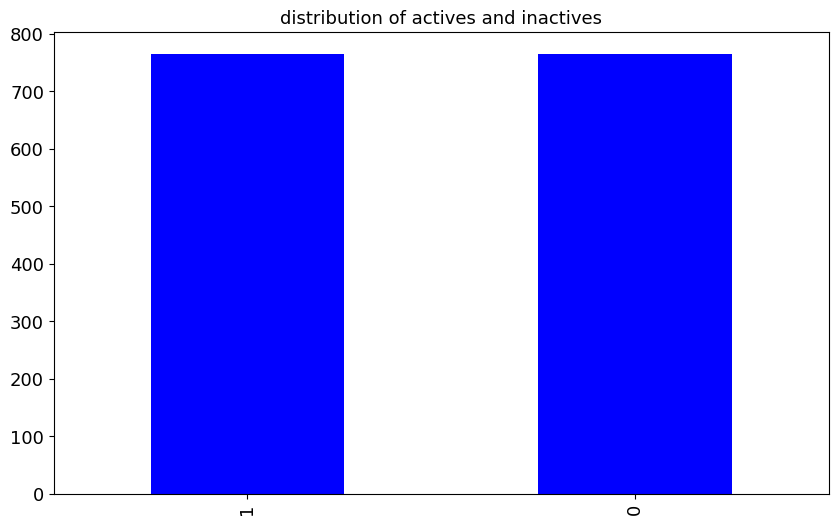

In [10]:
ax = y.value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='blue')
ax.set_title('distribution of actives and inactives', fontsize=13)
ax.set_alpha(0.5)

In [11]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.01, random_state=42)

In [12]:
# normalizing data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_validate = scaler.transform(X_validate)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_validate = pd.DataFrame(X_validate, columns=X.columns)

### Removing low variance features to improve model performance

In [13]:
from sklearn.feature_selection import VarianceThreshold


thresh = VarianceThreshold(threshold=0.03)
thresh.fit(X_train)
mask = thresh.get_support()


X_train = X_train.loc[:, mask]
X_validatee = X_validate.loc[:, mask]

X_train.shape, X_validate.shape

((1514, 613), (16, 777))

## training model with undersampled data

In [14]:
model = LinearSVC(max_iter=10000)
model.fit(X_train, y_train)

c:\Users\dopew\Desktop\fyp\venv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(max_iter=10000)

### evaluating the model using the test data

In [15]:
# getting the test dataset
testing_data = pd.concat([actives_test, inactives_test], ignore_index=True)

In [16]:
len(testing_data)

800

In [17]:
testing_data['activity'].value_counts()

1    400
0    400
Name: activity, dtype: int64

In [18]:
testing_data.head()

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D769,D770,D771,D772,D773,D774,D775,D776,D777,activity
0,1,0,0,0,2,0,0,0,0,0,...,0,1,0,0,0,5.087,0.343,0.240,0.314,1
1,0,0,0,0,3,0,0,0,0,0,...,0,1,0,0,0,5.087,-0.684,0.000,1.682,1
2,2,0,0,1,2,0,0,0,0,0,...,0,0,0,0,0,5.129,0.301,0.462,2.812,1
3,1,0,0,2,2,0,0,0,0,0,...,0,0,0,0,0,5.129,-0.323,0.231,1.792,1
4,2,0,0,0,3,0,0,0,0,0,...,0,0,1,0,0,5.000,-0.323,0.480,2.594,1


In [19]:
testing_data_x = testing_data.drop(['activity'], axis=1)
print(len(testing_data_x))
testing_data_x = scaler.transform(testing_data_x)
testing_data_y = testing_data['activity']

800


In [20]:
testing_data_x = pd.DataFrame(testing_data_x, columns=X.columns)

In [21]:
testing_data_x = testing_data_x.loc[:, mask]

In [22]:
testing_data_x.head()

,D001,D002,D003,D004,D005,D006,D007,D010,D012,D013,...,D765,D768,D770,D771,D772,D773,D774,D775,D776,D777
0,-0.674122,-0.106565,-0.03637,-1.017106,-0.226334,-0.162805,-0.063078,-0.025709,-0.329474,-0.917641,...,1.152720,-0.154494,1.392129,-0.275586,-0.03637,-0.151568,0.097419,1.034131,-0.651599,-1.409402
1,-2.025937,-0.106565,-0.03637,-1.017106,0.802705,-0.162805,-0.063078,-0.025709,-1.515453,1.103907,...,2.184173,-0.154494,1.392129,-0.275586,-0.03637,-0.151568,0.097419,-0.392619,-2.210296,-0.354180
2,0.677693,-0.106565,-0.03637,0.304695,-0.226334,-0.162805,-0.063078,-0.025709,0.619310,-0.412254,...,-0.910186,-0.154494,-0.520469,-0.275586,-0.03637,-0.151568,0.188623,0.975783,0.790196,0.517459
3,-0.674122,-0.106565,-0.03637,1.626496,-0.226334,-0.162805,-0.063078,-0.025709,-0.092278,0.598520,...,0.121267,-0.154494,-0.520469,-0.275586,-0.03637,-0.151568,0.188623,0.108897,-0.710050,-0.269330
4,0.677693,-0.106565,-0.03637,-1.017106,0.802705,-0.162805,-0.063078,-0.025709,0.144918,-0.412254,...,-0.910186,-0.154494,-0.520469,3.172660,-0.03637,-0.151568,-0.091503,0.108897,0.907098,0.349302


In [23]:
model.predict((testing_data_x.iloc[500]).to_numpy().reshape(1, -1))

c:\Users\dopew\Desktop\fyp\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [24]:
# converting the test dataset into a numpy array
testing_data_x = testing_data_x.to_numpy()

#### Model's accuracy on test set

In [25]:
model.score(testing_data_x, testing_data_y)

c:\Users\dopew\Desktop\fyp\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


0.79

### evaluating model's performance with F1 score, precision, recall, etc

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [27]:
y_pred = model.decision_function(testing_data_x)
y_pred_rounded = (y_pred > 0).astype(int)
y_pred_rounded.shape == y_pred.shape

c:\Users\dopew\Desktop\fyp\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


True

In [28]:
testing_data_y.shape == y_pred.shape

True

In [29]:
accuracy = accuracy_score(testing_data_y, y_pred_rounded)
precision = precision_score(testing_data_y, y_pred_rounded)
recall = recall_score(testing_data_y, y_pred_rounded)
f1 = f1_score(testing_data_y, y_pred_rounded)

In [31]:
print("accuracy is {}".format(accuracy))
print("precision is {}".format(precision))
print("recall is {}".format(recall))
print("f1 is {}".format(f1))

accuracy is 0.79
precision is 0.7871287128712872
recall is 0.795
f1 is 0.7910447761194029
